In [90]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras

In [91]:
rca_data=pd.read_csv('/content/root_cause_analysis.csv')

In [92]:
rca_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [93]:
# number of rows and columns in the dataframe
rca_data.shape

(1000, 9)

In [94]:
# getting more information about the dataset
rca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   CPU_LOAD          1000 non-null   int64 
 2   MEMORY_LEAK_LOAD  1000 non-null   int64 
 3   DELAY             1000 non-null   int64 
 4   ERROR_1000        1000 non-null   int64 
 5   ERROR_1001        1000 non-null   int64 
 6   ERROR_1002        1000 non-null   int64 
 7   ERROR_1003        1000 non-null   int64 
 8   ROOT_CAUSE        1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [95]:
# checking for missing values in each column
rca_data.isnull().sum()

ID                  0
CPU_LOAD            0
MEMORY_LEAK_LOAD    0
DELAY               0
ERROR_1000          0
ERROR_1001          0
ERROR_1002          0
ERROR_1003          0
ROOT_CAUSE          0
dtype: int64

In [96]:
rca_data['ID'].value_counts()

ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64

In [97]:
# distribution of target Variable
rca_data['ROOT_CAUSE'].value_counts()

ROOT_CAUSE
DATABASE_ISSUE    340
NETWORK_DELAY     337
MEMORY_LEAK       323
Name: count, dtype: int64

### Label Encoding the Root Cause Data

In [98]:
#Use a Label encoder to convert String to numeric values
#for the target variable
label_encoder = LabelEncoder()
rca_data['ROOT_CAUSE'] = label_encoder.fit_transform(rca_data['ROOT_CAUSE'])
rca_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,1
1,2,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,1,1,1
3,4,0,1,0,1,1,0,1,1
4,5,1,1,0,1,0,1,0,2


In [99]:
rca_data['ROOT_CAUSE'].value_counts()

ROOT_CAUSE
0    340
2    337
1    323
Name: count, dtype: int64

In [100]:
rca_data

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,1
1,2,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,1,1,1
3,4,0,1,0,1,1,0,1,1
4,5,1,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...
995,996,0,0,0,0,0,0,1,0
996,997,0,0,0,1,0,0,0,2
997,998,1,1,1,0,0,0,0,1
998,999,0,1,1,1,1,0,0,2


In [101]:
label_encoder.inverse_transform([rca_data['ROOT_CAUSE'][0]])

array(['MEMORY_LEAK'], dtype=object)

In [102]:
label_encoder.inverse_transform([0])

array(['DATABASE_ISSUE'], dtype=object)

### Separating the features & Target (Both way: FYI go to top)

In [103]:
#Removing ID column as it should not be a feature
X = rca_data.drop(columns=['ID','ROOT_CAUSE'], axis=1)
Y = rca_data['ROOT_CAUSE']


#Separate feature and target variables
#Convert input to numpy array
rca_data_numpy= rca_data.to_numpy()
X_data = rca_data_numpy[:,1:8]
Y_data=rca_data_numpy[:,8]


In [104]:
print(X_data,Y_data)

[[0 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]
 [1 0 0 ... 1 1 0]] [1 1 1 1 2 2 2 0 1 2 1 0 1 0 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 1 0 1 1 2 1 0 1
 0 0 2 2 0 1 0 2 2 2 0 2 0 1 0 0 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 1 2 1 0 1 0
 2 1 2 2 2 2 2 1 2 1 2 2 0 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 2 0 1 2 2 0 0 1 2
 2 2 0 0 0 1 1 1 2 1 0 2 0 0 2 2 2 1 0 2 1 0 0 0 0 0 2 1 1 2 0 0 1 0 2 1 2
 0 2 2 1 0 2 0 0 0 2 2 1 2 2 2 0 2 2 1 0 1 1 0 1 2 1 1 0 1 1 1 0 2 1 0 0 1
 0 1 2 0 1 1 1 2 1 2 0 0 0 0 1 0 2 1 1 0 2 0 1 1 0 0 0 2 0 0 0 1 2 0 1 0 0
 2 1 2 2 0 1 0 2 2 2 0 0 2 2 2 1 1 1 2 0 2 0 2 0 2 1 0 1 2 1 2 2 1 2 0 0 2
 2 1 1 0 0 0 1 0 2 2 1 0 2 2 0 0 0 2 2 0 2 1 2 0 0 2 0 2 2 2 0 0 0 0 1 1 0
 2 1 2 0 1 1 1 1 2 2 2 0 1 2 1 0 1 0 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 1 0 1 1
 2 1 0 1 0 0 2 2 0 1 0 2 2 2 0 2 0 1 0 0 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 1 2
 1 0 1 0 2 1 2 2 2 2 2 1 2 1 2 2 0 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 2 0 1 2 2
 0 0 1 2 2 2 0 0 0 1 1 1 2 1 0 2 0 0 2 2 2 1 0 2 1 0 0 

In [105]:
print(type(Y),type(Y_data), X.shape, X_data.shape)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> (1000, 7) (1000, 7)


In [106]:
#Convert target variable as a one-hot-encoding array,
num_class = 3
Y_data = tf.keras.utils.to_categorical(Y_data,num_class)

In [107]:
Y_data

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### Splitting the data to training data & Test data

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data , test_size=0.1, random_state=2, stratify = Y_data)

In [109]:
print(X_data.shape, X_train.shape, X_test.shape)

(1000, 7) (900, 7) (100, 7)


In [110]:
print(X_train)

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 0 1 0]
 [1 1 0 ... 0 0 1]]


In [111]:
print(Y_train[5])

[0. 0. 1.]


In [112]:
X_train.shape,X_train.shape[1]

((900, 7), 7)

###  Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [113]:
OUTPUT_CLASSES=len(label_encoder.classes_)
OUTPUT_CLASSES

3

In [114]:
#Number of classes in the target variable
num_class=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(X_train.shape[1],),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(num_class,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17923 (70.01 KB)
Trainable params: 17923 (70.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and evaluating the Model

Training the model involves defining various training models and then perform
forward and back propagation.

In [115]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=64
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 0.9195 - accuracy: 0.6542 - val_loss: 0.7340 - val_accuracy: 0.7556
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.8028 - val_loss: 0.5673 - val_accuracy: 0.7944
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.8097 - val_loss: 0.5098 - val_accuracy: 0.8111
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.8125 - val_loss: 0.4635 - val_accuracy: 0.8444
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.4854 - accuracy: 0.8250 - val_loss: 0.4517 - val_accuracy: 0.8389
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.8306 - val_loss: 0.4477 - val_accuracy: 0.8278
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8361 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 8/20
12/12 [=

### Plotting the accuracy against epoch

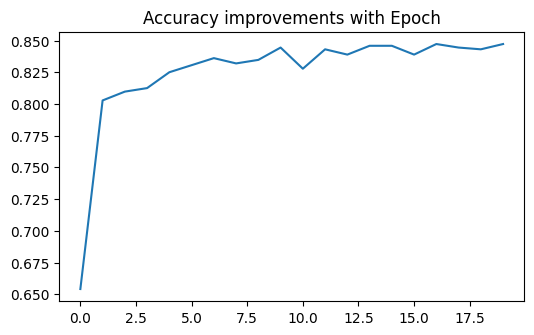

In [116]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(6, 3.5))
plt.title("Accuracy improvements with Epoch")
plt.show()

### Evaluation against the test Data

In [117]:
#Evaluate the model against the test dataset and print results
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.8600


[0.33228400349617004, 0.8600000143051147]

### Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [118]:
#Saving a model

model.save("rca_save.keras")

#Loading a Model
loaded_model = keras.models.load_model("rca_save.keras")

#Print Model Summary
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17923 (70.01 KB)
Trainable params: 17923 (70.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predictions with Deep Learning Models

In [119]:
#Raw prediction data
prediction_input = [[0,0,0,1,1,0,1]]
##or
"""

"""
input_data = (1,0,0,0,1,1,0)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
prediction_input = input_data_as_numpy_array.reshape(1,-1)


#Get raw prediction probabilities
raw_prediction = loaded_model.predict(prediction_input)

print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction

prediction = np.argmax(raw_prediction, axis=1)
print(prediction)
print("Prediction is ", label_encoder.inverse_transform(prediction))


1/1 [==============================] - 0s 82ms/step
Raw Prediction Output (Probabilities) : [[0.9316659  0.0614106  0.00692343]]
[0]
Prediction is  ['DATABASE_ISSUE']


In [120]:
#Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(
        model.predict([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis=1 )))

1/1 [==============================] - 0s 112ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
